## Script om clustermap te maken

#### Waternet Datalab, Rob van Putten, versie 2017-01

### Uitleg script
Dit script is bedoeld om een clustermap te maken (heatmap met dendrogram) van data uit een Excel bestand. De invoer is een matrix met data die in kolommen geordend is. De kolommen hebben elk hun eigen minima en maxima. In de rijen staan de locaties waar de waarden gemeten zijn.

We beginnen met het importeren van de bibliotheken;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

De data wordt ingelezen vanuit een csv bestand. 

**NB** dit kan ook direct vanuit een Excel bestand maar dat lukte even niet in de beschikbare tijd.

In [2]:
data = pd.read_csv('data.csv', index_col=0)
data.head()

,pollution,field,bact,algae,daphnid,cytotox non-polar,ER,anti-AR,GR,antibio,DR,PPARg,Nrf2,PXR,p53-
Site,,,,,,,,,,,,,,,
LNM,clean,0.00,0.04,0.0,0.0,0.0,0.04,0.08,0.0,0.00,0.25,0.51,0.41,0.91,0.0
LWP,clean,0.50,0.00,0.0,0.0,0.0,0.03,0.21,0.0,0.07,0.34,0.36,0.41,0.45,0.0
LBH,clean,0.25,0.06,0.0,0.0,0.0,0.02,0.54,0.0,0.00,0.39,0.53,0.58,1.00,0.0
LRW,clean,0.00,0.09,0.0,0.0,0.0,0.03,0.03,0.0,0.00,0.27,0.52,0.22,0.50,0.0
PKN,clean,1.50,0.10,0.0,0.0,0.0,0.21,0.04,0.0,0.00,0.25,0.89,0.86,0.50,0.0


We maken nu een gewone heatmap op basis van de gegevens. 

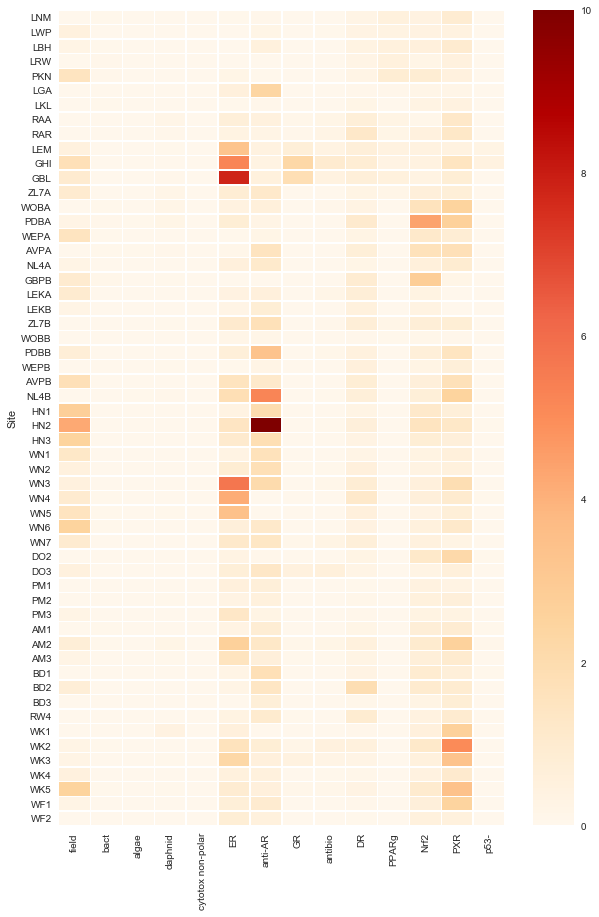

In [7]:
_ = plt.figure(figsize=(10,15))
_ = sns.heatmap(data.iloc[:,1:], linewidths=.5, cmap="OrRd")

En verolgens maken we een clustermap van de data waarbij we de labels in de rijen horizontaal zetten voor de leesbaarheid. 

/usr/local/lib/python3.5/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


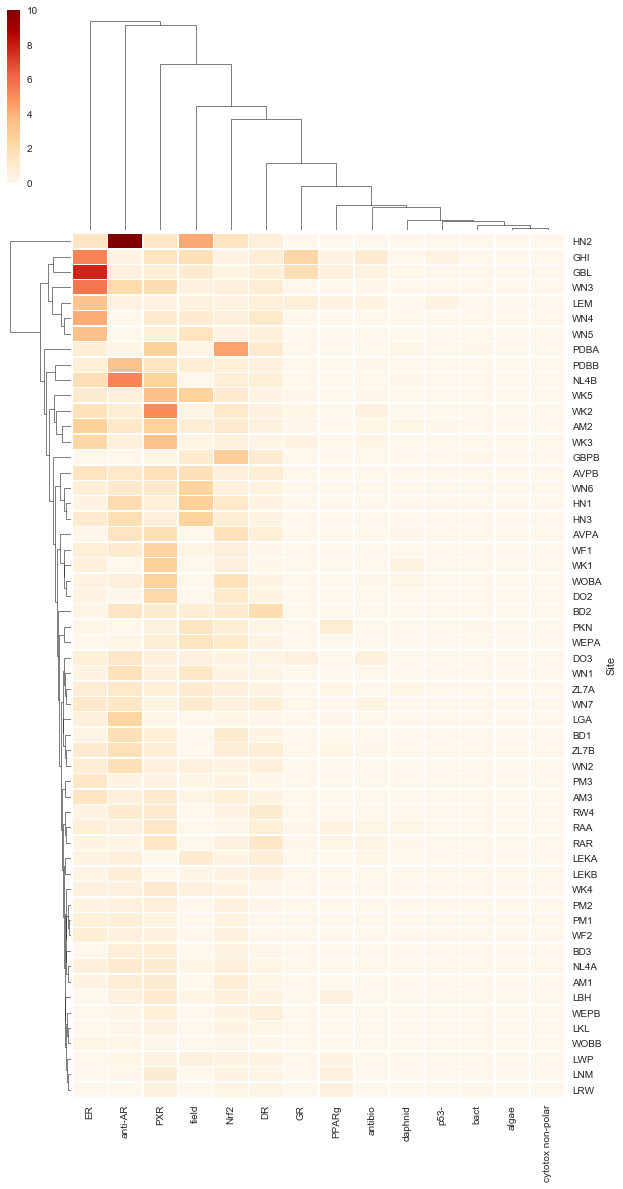

In [8]:
cm = sns.clustermap(data.iloc[:,1:], linewidths=.5, cmap="OrRd", figsize=(10,20))
labels = cm.ax_heatmap.yaxis.get_majorticklabels()
_ = plt.setp(labels, rotation=0)